# **Web And Social Media Analytics**

We have segregated the task into 3 Parts

- 1. DataProcessing and Wranling
- 2. Text and Sentimental Analysis
- 3. Modelling


# **Members**
- 1. Vishwanath Rajasekaran


# DataProcessing and Wrangling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing All necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import json
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime
import shutil

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

### The following data sets are available
1.   meta data of type .json
2.   phone data of type .csv

The meta data holds information from sellers point of view and the phone data holds user information.
We begin by unzipping the meta data file and extracting its content to a list



## Reading the  data



In [ ]:
# Reading the meta data

#Path to the meta data zip file. 'sentiment_analysis' is the folder name under 'My Drive'
path1 = '/content/drive/MyDrive/Colab Notebooks/Capstone/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
path2 = '/content/drive/MyDrive/Colab Notebooks/Capstone/meta_Cell_Phones_and_Accessories.json'

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries.
# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [ ]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

Taking only useful column to form a dataframe

In [ ]:
#converting the list phonemetadata into a data frame
df_meta = pd.DataFrame(phonemetadata, columns = ['category','description', 'title', 'also_buy','brand', 'feature',
                                                 'rank','also_view','similar_item', 'date', 'price', 'asin'])

In [ ]:
df_meta.shape

(590071, 12)

In [ ]:
# Categorizing only Cell Phone Category for furture analysis
df_meta['category'] = df_meta['category'].astype(str)
df_meta = df_meta[df_meta.category.str.contains("'Cell Phones'")]

In [ ]:
df_meta.shape

(9823, 12)

In [ ]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9823 entries, 36 to 590019
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      9823 non-null   object
 1   description   9823 non-null   object
 2   title         9823 non-null   object
 3   also_buy      9823 non-null   object
 4   brand         9823 non-null   object
 5   feature       9823 non-null   object
 6   rank          9823 non-null   object
 7   also_view     9823 non-null   object
 8   similar_item  9823 non-null   object
 9   date          9823 non-null   object
 10  price         9823 non-null   object
 11  asin          9823 non-null   object
dtypes: object(12)
memory usage: 997.6+ KB


In [ ]:
#Drop duplicates
df_meta = df_meta.loc[df_meta.astype(str).drop_duplicates().index]


In [ ]:
df_meta.shape

(9789, 12)

In [ ]:
df_meta.head()

,category,description,title,also_buy,brand,feature,rank,also_view,similar_item,date,price,asin
36,"['Cell Phones & Accessories', 'Cell Phones', '...","[ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...",UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",[],,,,8050110508
1274,"['Cell Phones & Accessories', 'Cell Phones', '...",[Standard package: 1 x original phone 1 x Qual...,Nokia 3310 Blue Nokia,"[B075FL4H89, B00R25GJJW]",Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...","[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...","class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",,B00005KBGR
1295,"['Cell Phones & Accessories', 'Cell Phones']",[The Nokia 5180i is a handset offered by TracF...,Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],Nokia,[],[],[],,,,B00005S0M4
1354,"['Cell Phones & Accessories', 'Cell Phones', '...","[Based on Motorola&#x92;s i90c phone, the i95c...",Motorola i95cl Phone (Nextel),[],,[],"[>#3,798,962 in Cell Phones & Accessories (See...",[],,,,B00006J9HH
1361,"['Cell Phones & Accessories', 'Cell Phones', '...",[This is a GSM Samsung R225 cellular phone tha...,T-Mobile Dual-Band Wireless Phone,[],Samsung,[],"[>#5,552,033 in Cell Phones & Accessories (See...",[],,,,B00006LIQB


In [ ]:
#Reading the .csv file of the phone data into a dataframe

df_phonedata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/Cell_Phones_and_Accessories_5.csv',index_col=False)

In [ ]:
df_phonedata.shape

(1128437, 12)

In [ ]:
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 95.8+ MB


In [ ]:
#drop image column that we will be not using for further anlaysis
df_phonedata1 = df_phonedata.drop(['image'], axis = 1)


In [ ]:
df_phonedata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  review_sentiment  1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 87.2+ MB


In [ ]:
df_phonedata1.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,POSITIVE


Dropping duplicate Data

In [ ]:
df_phonedata1 = df_phonedata1.drop_duplicates(keep='first')

In [ ]:
df_phonedata1.shape

(1124985, 11)

# Data pre-processing



In [ ]:
# Converting unix review time to date-time format

#Transforming unixReview time to date time format
from datetime import datetime, timedelta
df_phonedata1['unixReviewTime'] = df_phonedata1['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))


In [ ]:
df_phonedata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124985 entries, 0 to 1128436
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1124985 non-null  float64
 1   verified          1124985 non-null  bool   
 2   reviewerID        1124985 non-null  object 
 3   asin              1124985 non-null  object 
 4   style             604371 non-null   object 
 5   reviewerName      1124829 non-null  object 
 6   reviewText        1124218 non-null  object 
 7   summary           1124460 non-null  object 
 8   unixReviewTime    1124985 non-null  object 
 9   vote              91533 non-null    object 
 10  review_sentiment  1124985 non-null  object 
dtypes: bool(1), float64(1), object(9)
memory usage: 95.5+ MB


In [ ]:
#Replacing na values
df_phonedata1.overall = df_phonedata1.overall.astype(int)
df_phonedata1['reviewText'].replace('', np.nan, inplace=True)
df_phonedata1.dropna(subset=['reviewText'], inplace=True)
df_phonedata1['summary'].replace('', np.nan, inplace=True)
df_phonedata1.dropna(subset=['summary'], inplace=True)
df_phonedata1['style'].replace('', np.nan, inplace=True)
df_phonedata1['vote'].replace('', np.nan, inplace=True)

In [ ]:
round(((df_phonedata1.isnull().sum()*100)/len(df_phonedata1.index)),2)


overall              0.00
verified             0.00
reviewerID           0.00
asin                 0.00
style               46.28
reviewerName         0.01
reviewText           0.00
summary              0.00
unixReviewTime       0.00
vote                91.86
review_sentiment     0.00
dtype: float64

In [ ]:
#Fill na with bfill method
df_phonedata1 = df_phonedata1.fillna(method ='bfill')


In [ ]:
round(((df_phonedata1.isnull().sum()*100)/len(df_phonedata1.index)),2)


overall             0.00
verified            0.00
reviewerID          0.00
asin                0.00
style               0.00
reviewerName        0.00
reviewText          0.00
summary             0.00
unixReviewTime      0.00
vote                0.02
review_sentiment    0.00
dtype: float64

In [ ]:
#Rename Overall Column
df_phonedata1 = df_phonedata1.rename(columns={'overall': 'Rating'})

print ("Total data:", str(df_phonedata1.shape))
df_phonedata1.head()

Total data: (1123744, 11)


,Rating,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment
0,5,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,2014-08-03,2.0,POSITIVE
1,5,True,A269FLZCB4GIPV,7508492919,{'Color:': ' White'},sarah ponce,When you don't want to spend a whole lot of ca...,1,2014-02-11,2.0,POSITIVE
2,3,True,AB6CHQWHZW4TV,7508492919,{'Color:': ' White'},Kai,"so the case came on time, i love the design. I...",Its okay,2014-02-07,2.0,NEGATIVE
3,2,True,A1M117A53LEI8,7508492919,{'Color:': ' White'},Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,2014-02-03,2.0,POSITIVE
4,4,True,A272DUT8M88ZS8,7508492919,{'Color:': ' White'},Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,2014-02-02,2.0,POSITIVE


In [ ]:
df_phonedata1.columns

Index(['Rating', 'verified', 'reviewerID', 'asin', 'style', 'reviewerName',
       'reviewText', 'summary', 'unixReviewTime', 'vote', 'review_sentiment'],
      dtype='object')

In [ ]:
df_meta.columns

Index(['category', 'description', 'title', 'also_buy', 'brand', 'feature',
       'rank', 'also_view', 'similar_item', 'date', 'price', 'asin'],
      dtype='object')

In [ ]:
##########################################
## MERGING PHONE DATA AND METADATA IN PANDAS
##########################################

product_reviews=pd.merge(df_phonedata1,df_meta,on='asin',how='left')


In [ ]:
product_reviews.shape

(1123744, 22)

In [ ]:
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1123744 entries, 0 to 1123743
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Rating            1123744 non-null  int64 
 1   verified          1123744 non-null  bool  
 2   reviewerID        1123744 non-null  object
 3   asin              1123744 non-null  object
 4   style             1123738 non-null  object
 5   reviewerName      1123744 non-null  object
 6   reviewText        1123744 non-null  object
 7   summary           1123744 non-null  object
 8   unixReviewTime    1123744 non-null  object
 9   vote              1123504 non-null  object
 10  review_sentiment  1123744 non-null  object
 11  category          63438 non-null    object
 12  description       63438 non-null    object
 13  title             63438 non-null    object
 14  also_buy          63438 non-null    object
 15  brand             63438 non-null    object
 16  feature           

In [ ]:
round(((product_reviews.isnull().sum()*100)/len(product_reviews.index)),2)

Rating               0.00
verified             0.00
reviewerID           0.00
asin                 0.00
style                0.00
reviewerName         0.00
reviewText           0.00
summary              0.00
unixReviewTime       0.00
vote                 0.02
review_sentiment     0.00
category            94.35
description         94.35
title               94.35
also_buy            94.35
brand               94.35
feature             94.35
rank                94.35
also_view           94.35
similar_item        94.35
date                94.35
price               94.35
dtype: float64

# Data Wrangling

In [ ]:
##########################################
## DROP NULL VALUES IN PRODUCT TITLE COLUMN IN PANDAS
##########################################

product_reviews2=product_reviews.dropna(subset=['title'])


In [ ]:
product_reviews2.shape


(63438, 22)

In [ ]:
product_reviews2.title.unique()


array(['Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone',
       'PCS Phone palmOne Treo 600 (Sprint)',
       'Motorola i730 Phone (Nextel)', ...,
       'Unlocked JIAKE miniS5 MTK6572 2G ROM 5.0 Inch Android 4.2 3G Smartphone(Black)',
       'Sony Xperia Z3 Factory Unlocked Phone - Retail Packaging - White',
       'Samsung Galaxy Light SGH-T399N Android 4G-LTE Metro PCS Smartphone Brown'],
      dtype=object)

In [ ]:
##########################################
## EXTRACTING PHONES FROM TITLE COLUMN
##########################################
product_reviews_p = product_reviews2[product_reviews2["title"].str.contains("Phones|Phone|phones|phone")]

In [ ]:
product_reviews_p.shape

(45562, 22)

In [ ]:
##########################################
## CHECKING FOR MISSING VALUES
##########################################
product_reviews_p.isnull().sum()


Rating              0
verified            0
reviewerID          0
asin                0
style               0
reviewerName        0
reviewText          0
summary             0
unixReviewTime      0
vote                2
review_sentiment    0
category            0
description         0
title               0
also_buy            0
brand               0
feature             0
rank                0
also_view           0
similar_item        0
date                0
price               0
dtype: int64

In [ ]:
#Drop null fro vote column
product_reviews_p2=product_reviews_p.dropna(subset=['vote'])


In [ ]:
product_reviews_p2.isnull().sum()


Rating              0
verified            0
reviewerID          0
asin                0
style               0
reviewerName        0
reviewText          0
summary             0
unixReviewTime      0
vote                0
review_sentiment    0
category            0
description         0
title               0
also_buy            0
brand               0
feature             0
rank                0
also_view           0
similar_item        0
date                0
price               0
dtype: int64

In [ ]:
product_reviews_p2.shape

(45560, 22)

In [ ]:
#Dropping date and price column as we will be not be using it further
product_reviews_p2 = product_reviews_p2.drop(['date','price'], axis = 1)


In [ ]:
#product_reviews_p2.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/product_reviews_p2.csv')


In [ ]:
#product_reviews_p2.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/product_reviews_p2.csv.gz', compression='gzip')

In [ ]:
##########################################
## CONCATENATE REVIEWTEXT AND SUMMARY
##########################################

product_reviews_p2['review_text'] = product_reviews_p2[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
product_reviews_p3 = product_reviews_p2.drop(['reviewText', 'summary'], axis = 1)
product_reviews_p3.head()

,Rating,verified,reviewerID,asin,style,reviewerName,unixReviewTime,vote,review_sentiment,category,description,title,also_buy,brand,feature,rank,also_view,similar_item,review_text
654,1,False,A5JLAU2ARJ0BO,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Old-and-Wise,2004-09-20,2.0,NEGATIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],,Bad reception This phone is ugly and heavy and...
655,4,False,A1ACM1CBGORBN1,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Sherry Berry,2004-07-23,15.0,POSITIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],,Pretty good phone.. an improvement from my v20...
656,3,False,A2V48Q03FZUOSD,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Benjamin David,2004-07-05,11.0,NEGATIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],,Not as user friendly as the Motorola V300- Thi...
657,5,True,A1V3TRGWOMA8LC,B0000E3GWH,{'Package Type:': ' Standard Packaging'},James Beswick,2004-04-11,4.0,POSITIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],,The best phone I've ever owned ..and I'm from ...
658,3,False,A3NOBH42C7UI5M,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Kepela,2004-02-18,12.0,POSITIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],,I love the phone but it has some real problems...


In [ ]:
product_reviews_p3['review_text'][657]


"The best phone I've ever owned ..and I'm from Europe, where the phones and networks are much better than in the States. I have to say that I think Samsung currently have the best software (and I used to be a huge Nokia fan). Amazingly light, very intuitive, great audio, and just looks great. I recommend this without any reservations whatsoever."

In [ ]:
##########################################
## Classify ratings as good and bad
##########################################

good_rate = len(product_reviews_p3[product_reviews_p3['Rating'] >= 3])
bad_rate = len(product_reviews_p3[product_reviews_p3['Rating'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for Phones products'.format(good_rate))
print ('Bad ratings : {} reviews for Phones products'.format(bad_rate))

Good ratings : 39108 reviews for Phones products
Bad ratings : 6452 reviews for Phones products


In [ ]:
##########################################
# Apply the new classification to the ratings column
##########################################
product_reviews_p3['rating_class'] = product_reviews_p3['Rating'].apply(lambda x: 'bad' if x < 3 else'good')
product_reviews_p3.head()

,Rating,verified,reviewerID,asin,style,reviewerName,unixReviewTime,vote,review_sentiment,category,description,title,also_buy,brand,feature,rank,also_view,similar_item,review_text,rating_class
654,1,False,A5JLAU2ARJ0BO,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Old-and-Wise,2004-09-20,2.0,NEGATIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],,Bad reception This phone is ugly and heavy and...,bad
655,4,False,A1ACM1CBGORBN1,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Sherry Berry,2004-07-23,15.0,POSITIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],,Pretty good phone.. an improvement from my v20...,good
656,3,False,A2V48Q03FZUOSD,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Benjamin David,2004-07-05,11.0,NEGATIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],,Not as user friendly as the Motorola V300- Thi...,good
657,5,True,A1V3TRGWOMA8LC,B0000E3GWH,{'Package Type:': ' Standard Packaging'},James Beswick,2004-04-11,4.0,POSITIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],,The best phone I've ever owned ..and I'm from ...,good
658,3,False,A3NOBH42C7UI5M,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Kepela,2004-02-18,12.0,POSITIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],,I love the phone but it has some real problems...,good


In [ ]:
#Checking duplicates
product_reviews_p3[product_reviews_p3.duplicated(['unixReviewTime','reviewerName','asin'],keep= False)]


,Rating,verified,reviewerID,asin,style,reviewerName,unixReviewTime,vote,review_sentiment,category,description,title,also_buy,brand,feature,rank,also_view,similar_item,review_text,rating_class
8368,4,False,A1JOOF81AHW9,B0017QHCXE,{'Package Type:': ' Standard Packaging'},Jay Busari,2008-07-08,2.0,POSITIVE,"['Cell Phones & Accessories', 'Cell Phones', '...",[The Nokia N78 is one of the best among the N ...,"Nokia N78 Unlocked Phone with 3.2 MP Camera, 3...",[],Nokia,[This unlocked cell phone is compatible with G...,"[>#3,001,146 in Cell Phones & Accessories (See...",[],,Great Phone...Small Keypad Nokia seem to be ex...,good
8369,4,False,A1JOOF81AHW9,B0017QHCXE,{'Package Type:': ' Standard Packaging'},Jay Busari,2008-07-08,3.0,POSITIVE,"['Cell Phones & Accessories', 'Cell Phones', '...",[The Nokia N78 is one of the best among the N ...,"Nokia N78 Unlocked Phone with 3.2 MP Camera, 3...",[],Nokia,[This unlocked cell phone is compatible with G...,"[>#3,001,146 in Cell Phones & Accessories (See...",[],,"Great Phone, Small Keypad Nokia seem to be ex...",good
9324,5,True,A4G46Z5D8HWP1,B001BZH2QI,{'Color:': ' White'},Alberto Morales,2013-02-28,2.0,POSITIVE,"['Cell Phones & Accessories', 'Cell Phones', '...",[The Nokia E71 weighs 4.44 ounces and measures...,"Nokia E71 Unlocked Phone with 3.2 MP Camera, 3...",[],Nokia,[This unlocked cell phone is compatible with G...,"[>#787,529 in Cell Phones & Accessories (See T...","[B00851Q9L0, B001CJNHLC, B00B4HO91O, B00J1SMJ0...","class=""a-bordered a-horizontal-stripes a-spa...",Great Nokia phone This is just one of the best...,good
9325,5,True,A4G46Z5D8HWP1,B001BZH2QI,{'Color:': ' White'},Alberto Morales,2013-02-28,2.0,POSITIVE,"['Cell Phones & Accessories', 'Cell Phones', '...",[The Nokia E71 weighs 4.44 ounces and measures...,"Nokia E71 Unlocked Phone with 3.2 MP Camera, 3...",[],Nokia,[This unlocked cell phone is compatible with G...,"[>#787,529 in Cell Phones & Accessories (See T...","[B00851Q9L0, B001CJNHLC, B00B4HO91O, B00J1SMJ0...","class=""a-bordered a-horizontal-stripes a-spa...",Love the Phone This is just one of the best ph...,good
9326,5,True,A2X93EHPL91LC0,B001BZH2QI,{'Color:': ' White'},JOSE LUIS PAZ,2013-02-12,2.0,NEGATIVE,"['Cell Phones & Accessories', 'Cell Phones', '...",[The Nokia E71 weighs 4.44 ounces and measures...,"Nokia E71 Unlocked Phone with 3.2 MP Camera, 3...",[],Nokia,[This unlocked cell phone is compatible with G...,"[>#787,529 in Cell Phones & Accessories (See T...","[B00851Q9L0, B001CJNHLC, B00B4HO91O, B00J1SMJ0...","class=""a-bordered a-horizontal-stripes a-spa...","exelente buen vendedor lo recomiendo, estoy 10...",good
9327,5,True,A2X93EHPL91LC0,B001BZH2QI,{'Color:': ' White'},JOSE LUIS PAZ,2013-02-12,6.0,NEGATIVE,"['Cell Phones & Accessories', 'Cell Phones', '...",[The Nokia E71 weighs 4.44 ounces and measures...,"Nokia E71 Unlocked Phone with 3.2 MP Camera, 3...",[],Nokia,[This unlocked cell phone is compatible with G...,"[>#787,529 in Cell Phones & Accessories (See T...","[B00851Q9L0, B001CJNHLC, B00B4HO91O, B00J1SMJ0...","class=""a-bordered a-horizontal-stripes a-spa...","exelente buen vendedor lo recomiendo, estoy 10...",good
9353,5,True,A3IE7RPVIMTM5K,B001BZH2QI,{'Color:': ' White'},ILoveBuy!,2010-05-18,12.0,NEGATIVE,"['Cell Phones & Accessories', 'Cell Phones', '...",[The Nokia E71 weighs 4.44 ounces and measures...,"Nokia E71 Unlocked Phone with 3.2 MP Camera, 3...",[],Nokia,[This unlocked cell phone is compatible with G...,"[>#787,529 in Cell Phones & Accessories (See T...","[B00851Q9L0, B001CJNHLC, B00B4HO91O, B00J1SMJ0...","class=""a-bordered a-horizontal-stripes a-spa...",EXCELLENTE CELULAR ESTE CELULAR ME PERMITE EST...,good
9354,5,True,A3IE7RPVIMTM5K,B001BZH2QI,{'Color:': ' White'},ILoveBuy!,2010-05-18,12.0,NEGATIVE,"['Cell Phones & Accessories', 'Cell Phones', '...",[The Nokia E71 weighs 4.44 ounces and measures...,"Nokia E71 Unlocked Phone with 3.2 MP Camera, 3...",[],Nokia,[This unlocked cell phone is compatible with G...,"[>#787,529 in Cell Pho

In [ ]:
product_reviews_p3 = product_reviews_p3.drop_duplicates(['asin','reviewerName', 'unixReviewTime'], keep = 'first')


In [ ]:
product_reviews_p3.columns

Index(['Rating', 'verified', 'reviewerID', 'asin', 'style', 'reviewerName',
       'unixReviewTime', 'vote', 'review_sentiment', 'category', 'description',
       'title', 'also_buy', 'brand', 'feature', 'rank', 'also_view',
       'similar_item', 'review_text', 'rating_class'],
      dtype='object')

In [ ]:
#Rename column
product_reviews_p3 = product_reviews_p3.rename(columns={'unixReviewTime': 'DateTime'})


In [ ]:
product_reviews_p3.columns

Index(['Rating', 'verified', 'reviewerID', 'asin', 'style', 'reviewerName',
       'DateTime', 'vote', 'review_sentiment', 'category', 'description',
       'title', 'also_buy', 'brand', 'feature', 'rank', 'also_view',
       'similar_item', 'review_text', 'rating_class'],
      dtype='object')

In [ ]:
##########################################
## DESCRIPTIVE STATISTICS
##########################################

print ("================================================")

### Total reviews
total = len(product_reviews_p3)
print ("Number of reviews: ",total)
print ()

### How many unique reviewers?
print ("Number of unique reviewers: ",len(product_reviews_p3.reviewerID.unique()))
reviewer_prop = float(len(product_reviews_p3.reviewerID.unique()) *100/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

### How many unique Brand?
print ("Number of unique Brand: ", len(product_reviews_p3.brand.unique()))
product_prop = float(len(product_reviews_p3.brand.unique())*100/total)
print ("Prop of unique Brand: ",round(product_prop,3))
print ()

### Average star score
print ("Average rating score: ",round(product_reviews_p3.Rating.mean(),3))

print ("================================================")

Number of reviews:  45420

Number of unique reviewers:  25213
Prop of unique reviewers:  55.511

Number of unique Brand:  137
Prop of unique Brand:  0.302

Average rating score:  4.167


Text(0, 0.5, 'Number of Reviews')

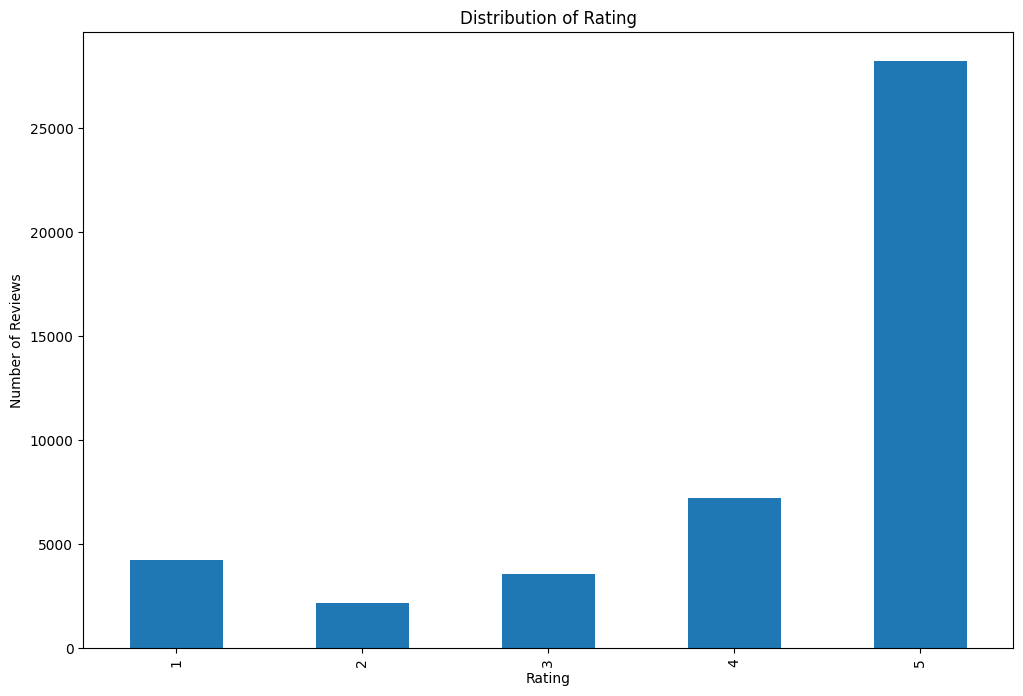

In [ ]:
##########################################
## PLOT DISTRIBUTION OF RATING
##########################################

plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
product_reviews_p3['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

In [ ]:
##########################################
## DISTRIBUTION OF RATING SCORE
##########################################

class_counts = product_reviews_p3.groupby('Rating').size()
class_counts

Rating
1     4246
2     2178
3     3565
4     7202
5    28229
dtype: int64

In [ ]:
##########################################
# Customer totals for each rating class
##########################################
product_reviews_p3['rating_class'].value_counts()

good    38996
bad      6424
Name: rating_class, dtype: int64

In [ ]:
# Statistics of non-numeric variables

# Number of unique Customers
print('\nNumber of unique customers : {}'.format(len(product_reviews_p3['reviewerID'].unique())))

# Number of unique Brands
print('\nNumber of unique Brands : {}'.format(len(product_reviews_p3['brand'].unique())))

# Review number per unique Customer
print('\nReview per customer: {}'.format((len(product_reviews_p3)/len(product_reviews_p3['Rating'].unique()))))

# Review number per unique Brand
print('\nReview per product: {}'.format((len(product_reviews_p3)/len(product_reviews_p3['brand'].unique()))))


Number of unique customers : 25213

Number of unique Brands : 137

Review per customer: 9084.0

Review per product: 331.53284671532845


### Descriptive Statistic Summary:



Rating Status:

25213 customer gives ratings and mean of the ratings is 4.1, which means that customers prefer to give high ratings for products.  To be able to predict the ratings reasonably, we classified them as 'good' and 'bad' above.

According to the statistics on rating stars:

4246 customers give 1 star

2178 customers give 2 stars

3565 customers give 3 stars

7202 customers give 4 stars

28229 customers give 5 stars

6424 customers give bad ratings

38996 customers give good ratings



## FINDING TOP 10 COMAPNIES ACCORDING TO NUMBER OF MODELS

In [ ]:
names = product_reviews_p3['brand']
names=names.str.lower()
names.head()
from collections import Counter
lis = []
for i in names:
    for j in i.split():
        lis.append(j)
# Calculating frequency of all words
freq = Counter(lis)

most_occur = freq.most_common(100)
print(most_occur)

[('samsung', 9235), ('blu', 7383), ('lg', 4041), ('apple', 3980), ('nokia', 3528), ('blackberry', 3143), ('motorola', 2922), ('htc', 1782), ('sony', 1307), ('huawei', 1104), ('tracfone', 820), ('asus', 730), ('zte', 636), ('alcatel', 489), ('lgic', 353), ('posh', 322), ('mobile', 322), ('pantech', 228), ('wireless,', 210), ('inc.', 210), ('palm', 197), ('at&t', 190), ('lenovo', 174), ('ericsson', 159), ('korea', 143), ('kyocera', 136), ('microsoft', 132), ('sharkk', 131), ('rca', 119), ('nextbit', 113), ('t-mobile', 105), ('motcb', 102), ('greatcall', 99), ('star', 98), ('casio', 68), ('google', 60), ('dell', 58), ('usa', 56), ('sanyo', 55), ('doogee', 54), ('verykool', 53), ('tokyoslurpkings', 50), ('oneplus', 48), ('electronics', 46), ('irulu', 42), ('svp', 39), ('tracone', 38), ('otterbox', 38), ('sky', 38), ('devices', 38), ('jiake', 35), ('tnso', 35), ('generic', 33), ('cubot', 32), ('polaroid', 32), ('sidekick', 31), ('moto', 29), ('x', 29), ('soonersoft', 29), ('jitterbug', 27),

FROM ABOVE LIST OF MOST OCCUCRING WORDS WE CAN GET ROUGH IDEA OF THE BRANDS THAT ARE IN THE TOP 10:

samsung                      
blu                           
lg                         
apple                                
nokia                                        
blackberry                          
motorola                                
htc                                   
sony                                        
Huawei

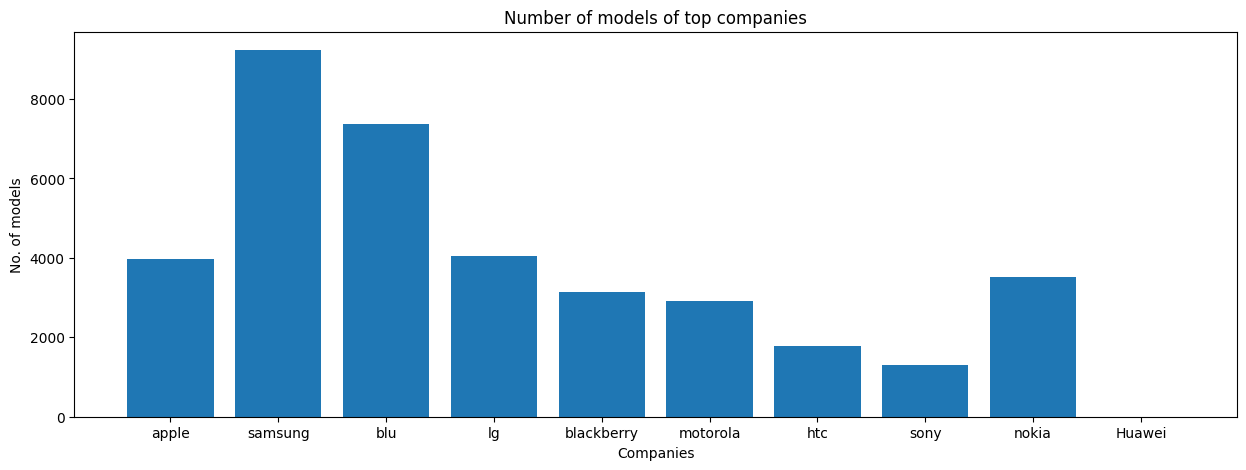

In [ ]:
top_companies=['apple','samsung','blu','lg','blackberry','motorola','htc','sony','nokia','Huawei']
no_of_models=[]
for i in top_companies:
    no_of_models.append(freq[i])


fig = plt.figure(figsize = (15, 5))
plt.bar(top_companies, no_of_models)
plt.xlabel("Companies")
plt.ylabel("No. of models")
plt.title("Number of models of top companies")
plt.show()

In [ ]:
product_reviews_p3.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/product_reviews_p3.csv', escapechar='\\')
